In [5]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from mlxtend.plotting import heatmap
    import seaborn as sns
    from scipy.stats import spearmanr 

In [6]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# Get the number of rows (samples) and columns (features)
num_samples, num_features = data.shape

# Print the number of samples and features
print(f"Number of Samples (Transactions): {num_samples}")
print(f"Number of Features (Attributes): {num_features}")

Number of Samples (Transactions): 284807
Number of Features (Attributes): 31


In [8]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


C:\Users\guggi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

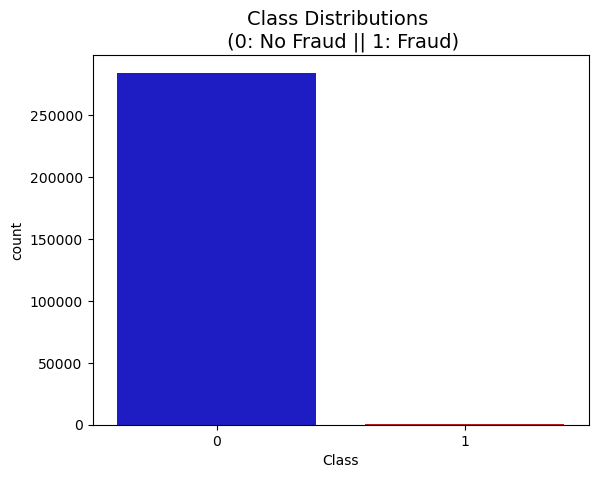

In [10]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [11]:
data[data.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

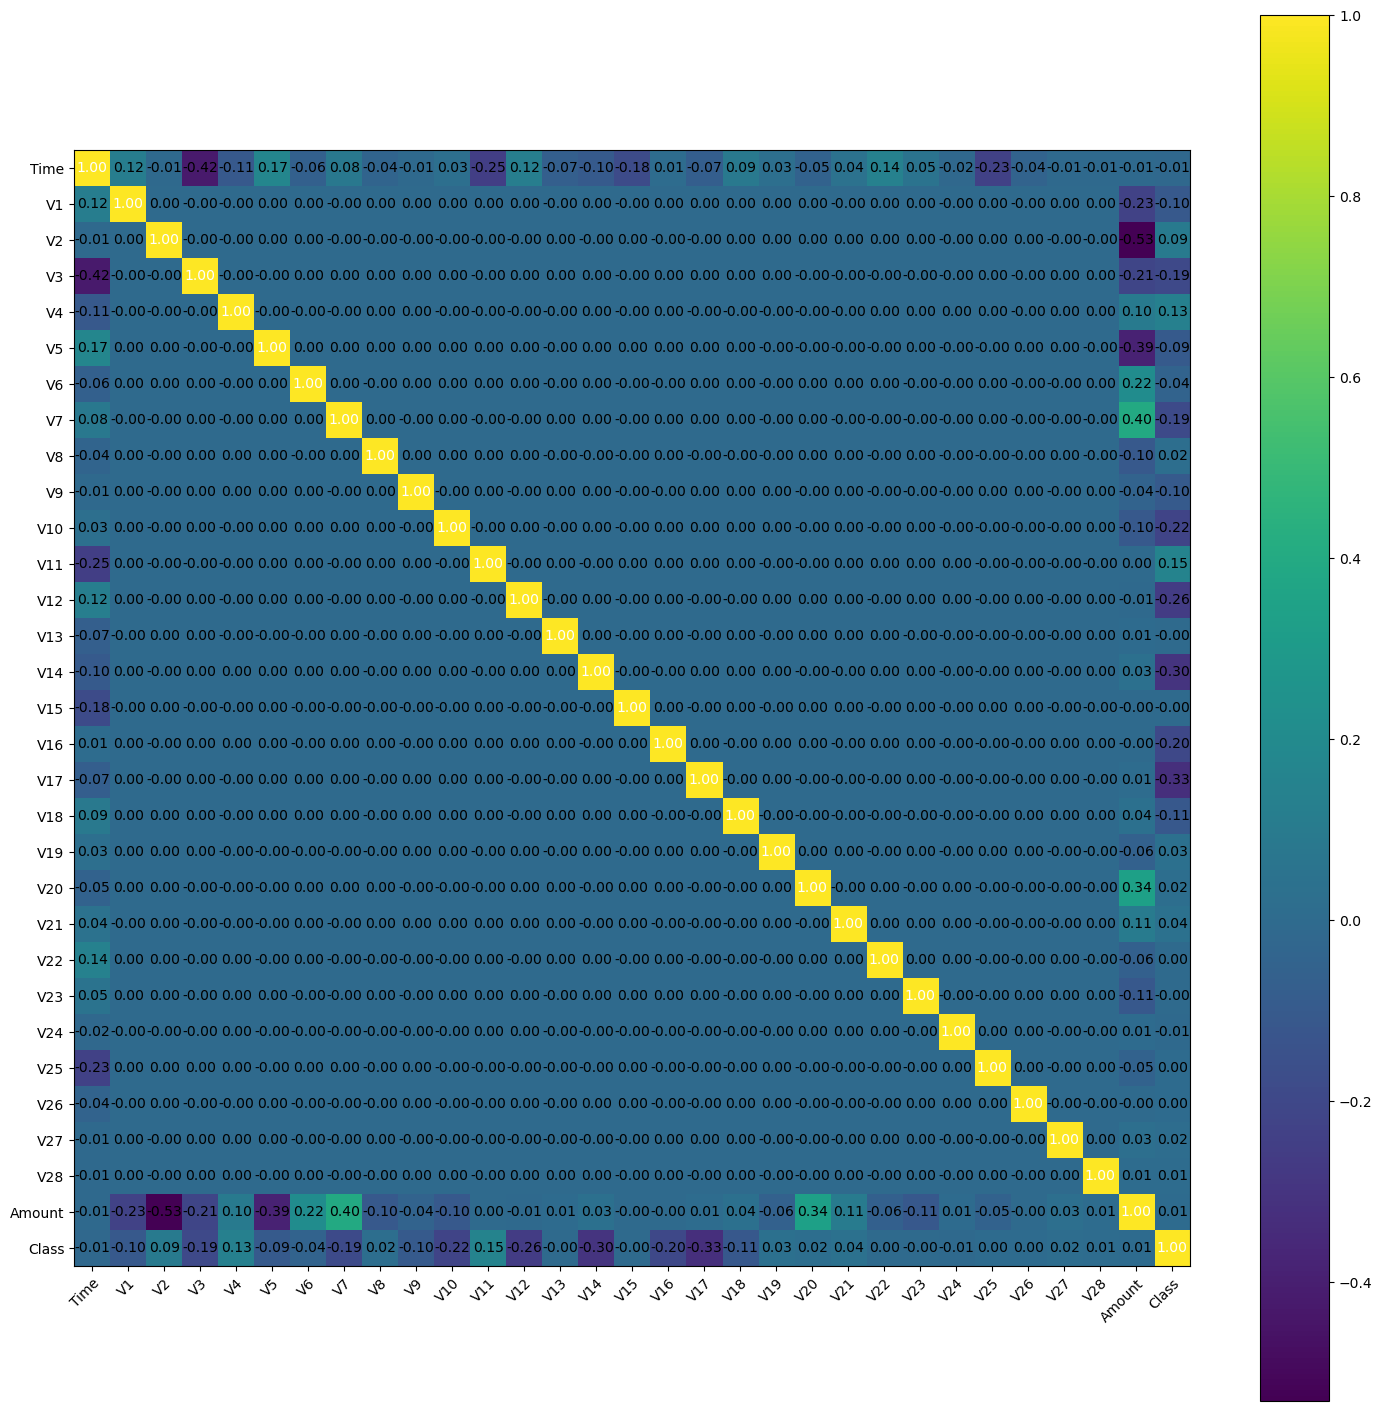

In [12]:
cols = data.columns     # List of colmuns of dataframe Arrival_ddelay
cm = np.corrcoef(data[cols].values.T) 
hm = heatmap(cm, figsize=(18,18), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

In [13]:
cols = data.columns     # List of colmuns of dataframe boston_df
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
# Calculate Spearman correlation coefficient between 'Class' and each feature 

for col in cols[:-1]:
    rho, p = spearmanr(data[col].values, data['Class'].values)
    print('Spearman correlation between Class and %s is %s' %(col, round(rho, 4)))

Spearman correlation between Class and Time is -0.0117
Spearman correlation between Class and V1 is -0.0424
Spearman correlation between Class and V2 is 0.0511
Spearman correlation between Class and V3 is -0.0593
Spearman correlation between Class and V4 is 0.063
Spearman correlation between Class and V5 is -0.0301
Spearman correlation between Class and V6 is -0.0384
Spearman correlation between Class and V7 is -0.0483
Spearman correlation between Class and V8 is 0.0227
Spearman correlation between Class and V9 is -0.0495
Spearman correlation between Class and V10 is -0.0596
Spearman correlation between Class and V11 is 0.0601
Spearman correlation between Class and V12 is -0.0629
Spearman correlation between Class and V13 is -0.0037
Spearman correlation between Class and V14 is -0.0646
Spearman correlation between Class and V15 is -0.0028
Spearman correlation between Class and V16 is -0.0499
Spearman correlation between Class and V17 is -0.0443
Spearman correlation between Class and V1

In [15]:
# Define a list of threshold values to test
thresholds = [100, 200, 500, 1000, 2000, 5000]

# Create an empty DataFrame to store results
threshold_results = pd.DataFrame(columns=['Threshold', 'Fraud Rate'])

# Iterate through each threshold value
for threshold in thresholds:
    # Create a binary column indicating whether the transaction amount exceeds the threshold
    data['Above_Threshold'] = (data['Amount'] > threshold).astype(int)
    
    # Calculate the fraud rate for transactions above the threshold
    fraud_rate = data[data['Above_Threshold'] == 1]['Class'].mean()
    
    # Append the threshold and fraud rate to the results DataFrame
    threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)

# Print the results
print(threshold_results)

   Threshold  Fraud Rate
0      100.0    0.002301
1      200.0    0.002948
2      500.0    0.003828
3     1000.0    0.003061
4     2000.0    0.001479
5     5000.0    0.000000


C:\Users\guggi\AppData\Local\Temp\ipykernel_6532\3978522978.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)
C:\Users\guggi\AppData\Local\Temp\ipykernel_6532\3978522978.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)
C:\Users\guggi\AppData\Local\Temp\ipykernel_6532\3978522978.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  threshold_results = threshold_results.append({'Threshold': threshold, 'Fraud Rate': fraud_rate}, ignore_index=True)
C:\Users\guggi\AppData\Local\Temp\ipykernel_65

C:\Users\guggi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\guggi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


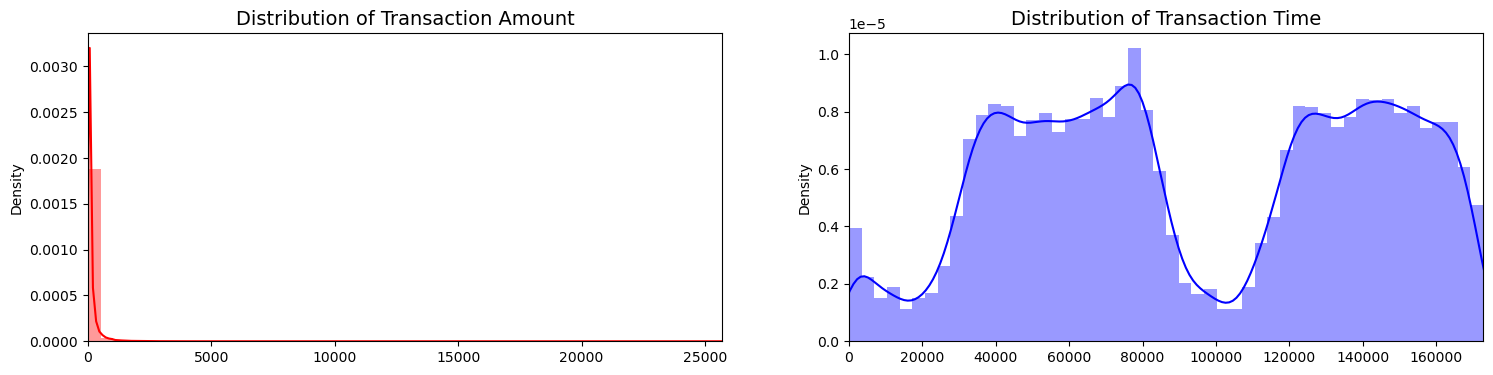

In [16]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()